# learned layer comparison

we compare molecules and rna.... on 3 modes: no-abstraction, hand made abstraction and learned abstraction.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')


In [ ]:
# short test of the draw function... 

# interesting :) 
#transpose([ [np.mean(e),np.std(e)] for e in scores]

import numpy as np
import matplotlib.pyplot as plt
def make_inbetween_plot(labels=[50,100,150],means=[(20, 35, 40),(20, 40 , 60)],stds=[(2, 3,5),(3, 3,3)]):
    #N = len(labels)
    #ind = np.arange(N) 
    #width = 0.35
    plt.figure(figsize=(14, 5))
    fig, ax = plt.subplots()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(14)
    #ax.ylim(0.0,100)
    plt.ylim(-5,80)
    plt.xlim(0,400)

    
    def fillthing(y,std,label='some label',col='b'):
        y=np.array(y)
        std=np.array(std)
        ax.fill_between(labels,y+std,y-std,facecolor=col,alpha=0.15,linewidth=0)
        #ax.plot(labels,y,label=label,color='gray')
        ax.plot(labels,y,color='gray')
        
    #ax.errorbar(labels, means[0], yerr= stds[0], fmt='o')
    #ax.errorbar(labels, means[1], yerr= stds[1], fmt='x')
    fillthing(means[0],stds[0],col='#6A9AE2')
    #fillthing(means[1],stds[1],col='#8DDD82')# some green.. maybe use yellow..
    fillthing(means[1],stds[1],col='#F94D4D')
    
    ax.plot(labels,means[0],label='extended grammar',color='b',linewidth=2.0)
    ax.plot(labels,means[1],label='normal grammar',color='r',linewidth=2.0)
    #ax.plot(labels,infernal,label='Infernal',color='#3F3F3F',linewidth=2.0,ls='--')
    plt.axhline(y=38, color='black',linewidth=2,ls='dotted')
    
    # add some text for labels, title and axes ticks
    labelfs=16
    ax.set_ylabel('Infernal bit score',fontsize=labelfs)
    ax.set_xlabel('training sequences',fontsize=labelfs)
    ax.legend(loc='lower left')

    plt.show()
    
make_inbetween_plot()

# Chem

In [ ]:
import layerutils as lu 

repeats = 3
train_size = 500
test_size_per_class = 300
neg_vec_count = 500
pick_strategy = 'random'

if True:
    repeats = 2
    train_size = 30
    test_size_per_class = 100
    neg_vec_count = 30
    pick_strategy = 'random'

data= lu.make_data('651610', 
                   repeats = repeats,
                   train_size= train_size,
                   test_size_per_class = test_size_per_class,
                   neg_vec_count = neg_vec_count,
                   pick_strategy = pick_strategy)


In [ ]:
import layerutils as lu
lu.make_inbetween_plot()


indicator of tak-ease:
crossval train: 0.9345 +- 0.0106   crossval: 0.6650 +- 0.0237
{'active': 483, 'inactive': 126}


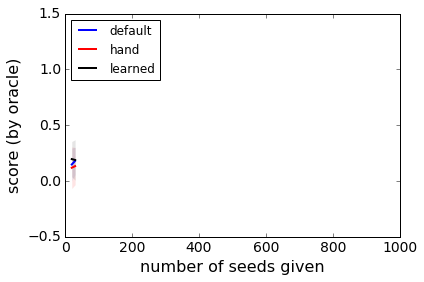

In [9]:
import numpy as np
import layerutils as lu
assay_id = '651610'  # apr93 23k mols
repeats = 3
n_iter = 25
train_sizes = [20,50,100,200,500,750,1000]

'''
THE PLAN IS SIMPLE
1. make_samplers  ( there are 3 )
2. evaluate results  -> mmm sss mmm sss
3. probably transpose
4. draw
'''

if True:  # debug
    assay_id = '1834' # 1834 is bad because there are too few compounds :D  65* is too large for testing
    repeats = 2
    n_iter = 2
    train_sizes= [20,30]


samplers_chem = lu.make_samplers_chem()
data_chem  = lu.make_data(assay_id,
               repeats=repeats,
               trainclass=1,
               train_sizes=train_sizes,
               test_size_per_class=300,
               pick_strategy='cluster') # cluster random  highscoring
graphs_chem = lu.run_experiments(samplers_chem,data_chem)
means,stds = lu.evaluate(graphs_chem,data_chem)
lu.make_inbetween_plot(labels=train_sizes, means=means , stds=stds)    
